## Task 3- To Explore Unsupervised Machine Learning
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
### By. Kailash Singh

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Importing Datasets

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

N.A values are 0

#### Unique Categorical Values

In [5]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Defining inputs

In [6]:
x = data.iloc[:,1:5].values
print(x.shape)

(150, 4)


### Elbow Method

In [7]:
from sklearn.cluster import KMeans
mdl = KMeans()

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)
clust = range(1,11)
print(wcss)

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.93873974358975, 34.190687924796634, 29.90537429982511, 27.927882157034986, 25.955497086247092]


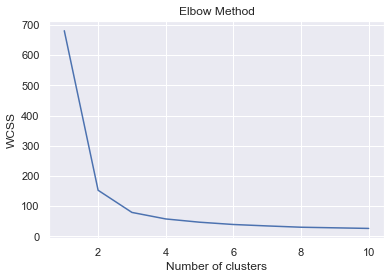

In [9]:
plt.plot(clust, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Infrences to take n = 3
1. Optimal No. of Clusters = 3 (because after 3 the variation in wcss became slight constant
2. Change in inertia after 3 is 36% (at 2 is 94%, at 4 is 23%, at 5 is 21%, and at 6 is 11%), so the constant decrement is begained after 3.
3. After 3 the graph is almost straight like an elbow

### Importing K Means

In [10]:
mdl = KMeans(n_clusters = 3, init = 'k-means++',random_state = 0)
reg = mdl.fit(x)
reg

KMeans(n_clusters=3, random_state=0)

In [11]:
d1 = data.copy()

In [12]:
d1['Clusters'] = reg.fit_predict(x)
d1.head(-50)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,2
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,2
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,2
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,2


##### From above data
###### Cluster 0 =  Virginica
###### Cluster 1 = Setosa
###### Cluster 2 = Versicolor

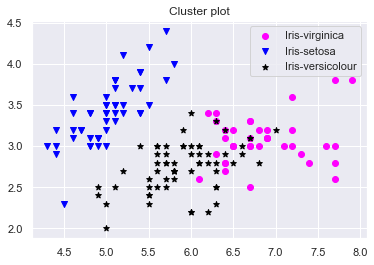

In [13]:
plt.scatter(x[reg.fit_predict(x) == 0, 0], x[reg.fit_predict(x) == 0, 1], marker = 'o', c = 'magenta', label = 'Iris-virginica')
plt.scatter(x[reg.fit_predict(x) == 1, 0], x[reg.fit_predict(x) == 1, 1], marker = 'v', c = 'blue', label = 'Iris-setosa')
plt.scatter(x[reg.fit_predict(x) == 2, 0], x[reg.fit_predict(x) == 2, 1], marker = '*', c = 'black', label = 'Iris-versicolour')
plt.title('Cluster plot')
plt.legend(scatterpoints = 1)
plt.show()

### Cluster Centers

In [14]:
reg.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### Centroid Plot

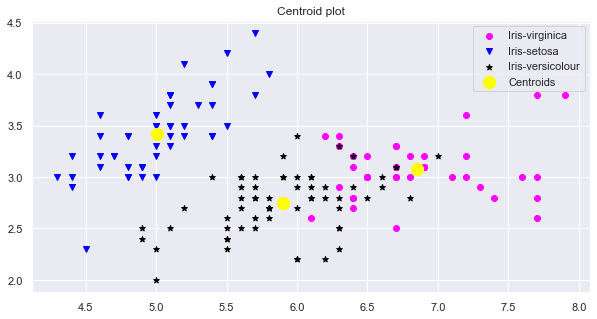

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(x[reg.fit_predict(x) == 0, 0], x[reg.fit_predict(x) == 0, 1], marker = 'o', c = 'magenta', label = 'Iris-virginica')
plt.scatter(x[reg.fit_predict(x) == 1, 0], x[reg.fit_predict(x) == 1, 1], marker = 'v', c = 'blue', label = 'Iris-setosa')
plt.scatter(x[reg.fit_predict(x) == 2, 0], x[reg.fit_predict(x) == 2, 1], marker = '*', c = 'black', label = 'Iris-versicolour')
plt.scatter(reg.cluster_centers_[:, 0], reg.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Centroid plot')
plt.legend(scatterpoints = 1)
plt.show()